In [10]:
!pip install kaggle

import os
import zipfile

# Set your Kaggle API credentials (API key)
os.environ['KAGGLE_USERNAME'] = 'yoy API username'
os.environ['KAGGLE_KEY'] = 'Your API key'

# Specify the dataset details
dataset_slug = "uciml/breast-cancer-wisconsin-data"
dataset_path = "/content/breast_cancer_dataset"  # Update with the desired path to save the dataset

# Download the dataset using Kaggle API
!kaggle datasets download -d {dataset_slug} -p {dataset_path} --unzip

print("Dataset downloaded at:", dataset_path)




  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 54.2MB/s]
Dataset downloaded at: /content/breast_cancer_dataset


In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout




In [27]:
import os

# Specify the dataset path
dataset_path = "/content/breast_cancer_dataset"

# List the files and directories within the dataset path
files = os.listdir(dataset_path)
for file in files:
    print(file)


data.csv


In [28]:
import pandas as pd

# Specify the path to the CSV file
csv_file_path = "/content/breast_cancer_dataset/data.csv"

# Read the CSV file
data = pd.read_csv(csv_file_path)

# Perform operations on the data
# ...

# Example: Print the first few rows of the dataset
print(data.head())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [46]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [49]:
df = data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [50]:
data = load_breast_cancer()
label_names = data["target_names"]
labels = data["target"]
feature_names = data["feature_names"]
features = data["data"]

In [51]:
train, test, train_labels, test_labels = train_test_split(features, labels,
                                                          test_size=0.2,
                                                          random_state=42)

In [52]:
gnb = GaussianNB()
gnb.fit(train, train_labels)

GaussianNB()

In [54]:
preds = gnb.predict(test)
print(preds, "\n")

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0] 



In [55]:
print(accuracy_score(test_labels, preds))

0.9736842105263158


In [58]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 75.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [59]:
from pycaret.classification import *

In [61]:
# delete unnecessary columns
df = df.drop(columns=['id', 'Unnamed: 32'], axis=1)

In [62]:
# setup the data
clf = setup(df, target='diagnosis')

,Description,Value
0,Session id,4548
1,Target,diagnosis
2,Target type,Binary
3,Target mapping,"B: 0, M: 1"
4,Original data shape,"(569, 31)"
5,Transformed data shape,"(569, 31)"
6,Transformed train set shape,"(398, 31)"
7,Transformed test set shape,"(171, 31)"
8,Numeric features,30
9,Preprocess,True


In [63]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9623,0.9922,0.9324,0.9679,0.9476,0.9183,0.9211,0.8970
et,Extra Trees Classifier,0.9599,0.9924,0.9262,0.9664,0.9431,0.9124,0.9157,0.4450
xgboost,Extreme Gradient Boosting,0.9597,0.9918,0.9186,0.9742,0.9431,0.9121,0.9156,0.2150
ada,Ada Boost Classifier,0.9548,0.9838,0.9257,0.9544,0.9374,0.9022,0.9052,0.3440
ridge,Ridge Classifier,0.9523,0.0000,0.8786,0.9923,0.9301,0.8944,0.9001,0.1390
lda,Linear Discriminant Analysis,0.9523,0.9856,0.8919,0.9804,0.9320,0.8956,0.8999,0.0910
lightgbm,Light Gradient Boosting Machine,0.9523,0.9888,0.9186,0.9534,0.9332,0.8962,0.8993,0.4970
gbc,Gradient Boosting Classifier,0.9522,0.9915,0.9124,0.9625,0.9320,0.8956,0.9012,0.7670
lr,Logistic Regression,0.9497,0.9911,0.9257,0.9422,0.9309,0.8916,0.8949,0.8280
qda,Quadratic Discriminant Analysis,0.9474,0.9817,0.9257,0.9411,0.9302,0.8881,0.8919,0.0860


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=4548, verbose=0, warm_start=False)

In [65]:
# select the best model
model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9250,0.9920,0.8000,1.0000,0.8889,0.8333,0.8452
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9750,0.9973,0.9333,1.0000,0.9655,0.9459,0.9473
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9500,0.9947,0.8667,1.0000,0.9286,0.8904,0.8958
5,0.9500,0.9960,0.9333,0.9333,0.9333,0.8933,0.8933
6,0.9750,1.0000,1.0000,0.9375,0.9677,0.9474,0.9487
7,0.9250,0.9680,0.9333,0.8750,0.9032,0.8421,0.8433
8,0.9487,0.9771,0.8571,1.0000,0.9231,0.8850,0.8909


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

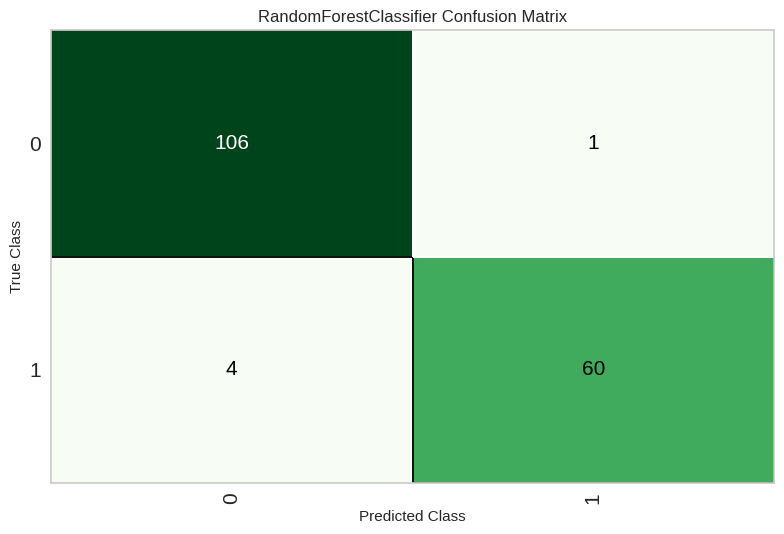

In [66]:
# plot confusion matrix
plot_model(model, plot = 'confusion_matrix')

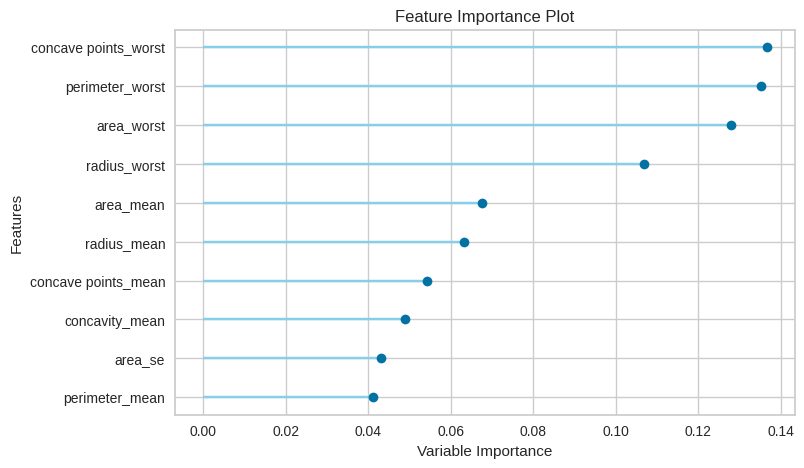

In [67]:
# plot feature importance
plot_model(model, plot = 'feature')

In [68]:
# hyperparameter tuning
best_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9250,0.9840,0.8000,1.0000,0.8889,0.8333,0.8452
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9750,1.0000,0.9333,1.0000,0.9655,0.9459,0.9473
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9250,0.9920,0.8667,0.9286,0.8966,0.8378,0.8391
5,0.9250,0.9920,0.8667,0.9286,0.8966,0.8378,0.8391
6,0.9750,1.0000,1.0000,0.9375,0.9677,0.9474,0.9487
7,0.9250,0.9707,0.9333,0.8750,0.9032,0.8421,0.8433
8,0.9744,0.9829,0.9286,1.0000,0.9630,0.9434,0.9449


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [69]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…